### Exploratory Data Analysis

### Load data for processing

In [407]:
# read two data files
import pandas as pd
import numpy as np
credits_df = pd.read_csv('/Users/Faisal/Development/recommender-storage/data/tmdb_credits.csv')
movies_df = pd.read_csv('/Users/Faisal/Development/recommender-storage/data/tmdb_movies.csv')

In [408]:
# check credits dataset
credits_df.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [409]:
# check movies dataset
movies_df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [410]:
# Join two dataset based on id (movie_id)
credits_df.columns = ['id','tittle','cast','crew']
df = movies_df.merge(credits_df, on='id')

In [411]:
# check joined dataset

df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Remove unnecessary columns

In [412]:
# check columns

df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'tittle', 'cast', 'crew'],
      dtype='object')

In [413]:
# drop unnecessary columns

df = df.drop(['budget', 'homepage',
              'original_title', 'production_companies',
              'release_date', 'revenue', 'runtime',
              'spoken_languages', 'status', 'tagline','tittle'], axis=1)

In [414]:
# check available columns
df.columns

Index(['genres', 'id', 'keywords', 'original_language', 'overview',
       'popularity', 'production_countries', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

In [415]:
# rename columns

df.columns = ['genres', 'id', 'keywords',
              'language', 'overview',
              'popularity', 'countries',
              'title', 'vote_average',
              'vote_count', 'cast', 'crew']

In [416]:
# check data after removing unnecessary columns
df.head(1)

,genres,id,keywords,language,overview,popularity,countries,title,vote_average,vote_count,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [417]:
# Check for null values
df.isnull().sum()

genres          0
id              0
keywords        0
language        0
overview        3
popularity      0
countries       0
title           0
vote_average    0
vote_count      0
cast            0
crew            0
dtype: int64

In [418]:
# fill null values with empty string

df['overview'] = df['overview'].fillna('')

In [419]:
# Check for null values
df.isnull().sum()

genres          0
id              0
keywords        0
language        0
overview        0
popularity      0
countries       0
title           0
vote_average    0
vote_count      0
cast            0
crew            0
dtype: int64

In [420]:
# check data
df.head(5)

,genres,id,keywords,language,overview,popularity,countries,title,vote_average,vote_count,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Demographic Recommendation

In [421]:
# find mean vote accross the whole dataset
C = df['vote_average'].mean()
C

6.092171559442011

In [422]:
# find minimum vote requires to be listed
m = df['vote_count'].quantile(.9)
m

1838.4000000000015

In [423]:
# all all the movies that matches minimum vote requirments
movies_filter_by_vote_count = df.copy().loc[df['vote_count'] >= m]
movies_filter_by_vote_count.shape

(481, 12)

In [424]:
# weighted rating calculation
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [425]:
# Add a new feature 'score' and calculate its value with `weighted_rating()`
movies_filter_by_vote_count['score'] = movies_filter_by_vote_count.apply(weighted_rating, axis=1)

In [426]:
# check data
movies_filter_by_vote_count.head(5)

,genres,id,keywords,language,overview,popularity,countries,title,vote_average,vote_count,cast,crew,score
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.346721
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.096368


In [427]:
# find top trending movies based on score
trending_movies = movies_filter_by_vote_count.sort_values('score', ascending=False)

#Print the top 10 movies
trending_movies.head(10)

,genres,id,keywords,language,overview,popularity,countries,title,vote_average,vote_count,cast,crew,score
1881,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,Framed in the 1940s for the double murder of h...,136.747729,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",The Shawshank Redemption,8.5,8205,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.059258
662,"[{""id"": 18, ""name"": ""Drama""}]",550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",Fight Club,8.3,9413,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.939256
65,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Batman raises the stakes in his war on crime. ...,187.322927,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",The Dark Knight,8.2,12002,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.920020
3232,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,"A burger-loving hit man, his philosophical par...",121.463076,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",Pulp Fiction,8.3,8428,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",7.904645
96,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",Inception,8.1,13752,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",7.863239
3337,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",238,"[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""na...",en,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",The Godfather,8.4,5893,"[{""cast_id"": 5, ""character"": ""Don Vito Corleon...","[{""credit_id"": ""52fe422bc3a36847f80093c9"", ""de...",7.851236
95,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar chronicles the adventures of a gr...,724.247784,"[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",Interstellar,8.1,10867,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",7.809479
809,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",13,"[{""id"": 422, ""name"": ""vietnam veteran""}, {""id""...",en,A man with a low IQ has accomplished great thi...,138.133331,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",Forrest Gump,8.2,7927,"[{""cast_id"": 7, ""character"": ""Forrest Gump"", ""...","[{""credit_id"": ""52fe420ec3a36847f800076b"", ""de...",7.803188
329,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",122,"[{""id"": 603, ""name"": ""elves""}, {""id"": 606, ""na...",en,Aragorn is revealed as the heir to the ancient...,123.630332,"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}, ...",The Lord of the Rings: The Return of the King,8.1,8064,"[{""cast_id"": 12, ""character"": ""Frodo Baggins"",...","[{""credit_id"": ""52fe421bc3a36847f80046c3"", ""de...",7.727243
1990,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",1891,"[{""id"": 526, ""name"": ""rebel""}, {""id"": 803, ""na...",en,"The epic saga continues as Luke Skywalker, in ...",78.517830,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",The Empir

In [428]:
# find top movies based on popularity
popular_movies = df.sort_values('popularity', ascending=False)

In [429]:
# check value count for each language
df['language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: language, dtype: int64

In [430]:
# filter movies based on language

movies_filter_by_language = df.copy().loc[df['language'] == 'fr']
movies_filter_by_language['score'] = movies_filter_by_language.apply(weighted_rating, axis=1)

In [431]:
# find top k movies by language
trending_movies_by_language = movies_filter_by_language.sort_values('score', ascending=False)
trending_movies_by_language.head(10)

# Returns the list top genres from genres object
def to_genres(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        return names
    #Return empty list in case of missing/malformed data
    return []

In [432]:
# convert genres to list
from ast import literal_eval
movies_by_genres = df.copy()
movies_by_genres['genres'] = movies_by_genres['genres'].apply(literal_eval)
movies_by_genres['genres'] = movies_by_genres['genres'].apply(to_genres)

# Filter movies by specific genres
movies_by_genres = movies_by_genres[movies_by_genres.loc[0:, 'genres'].apply(lambda row: 'Drama' in row)]

# sort based on score
movies_by_genres['score'] = movies_by_genres.apply(weighted_rating, axis=1)
movies_by_genres = movies_by_genres.sort_values('score', ascending=False)

movies_by_genres.head(5)

,genres,id,keywords,language,overview,popularity,countries,title,vote_average,vote_count,cast,crew,score
1881,"[Drama, Crime]",278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,Framed in the 1940s for the double murder of h...,136.747729,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",The Shawshank Redemption,8.5,8205,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.059258
662,[Drama],550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",Fight Club,8.3,9413,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.939256
65,"[Drama, Action, Crime, Thriller]",155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Batman raises the stakes in his war on crime. ...,187.322927,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",The Dark Knight,8.2,12002,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.920020
3337,"[Drama, Crime]",238,"[{""id"": 131, ""name"": ""italy""}, {""id"": 699, ""na...",en,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",The Godfather,8.4,5893,"[{""cast_id"": 5, ""character"": ""Don Vito Corleon...","[{""credit_id"": ""52fe422bc3a36847f80093c9"", ""de...",7.851236
95,"[Adventure, Drama, Science Fiction]",157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar chronicles the adventures of a gr...,724.247784,"[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",Interstellar,8.1,10867,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",7.809479


In [433]:
def to_countries(x):
    if isinstance(x, list):
        names = [i['iso_3166_1'] for i in x]
        return names
    #Return empty list in case of missing/malformed data
    return []

In [434]:
movies_by_counties = df.copy()
movies_by_counties['countries'] = movies_by_counties['countries'].apply(literal_eval)
movies_by_counties['countries'] = movies_by_counties['countries'].apply(to_countries)

# Filter movies by specific genres
movies_by_counties = movies_by_counties[movies_by_counties.loc[0:, 'countries'].apply(lambda row: 'US' in row)]

# sort based on score
movies_by_counties['score'] = movies_by_counties.apply(weighted_rating, axis=1)
movies_by_counties = movies_by_counties.sort_values('score', ascending=False)

movies_by_counties.head(5)

,genres,id,keywords,language,overview,popularity,countries,title,vote_average,vote_count,cast,crew,score
1881,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,Framed in the 1940s for the double murder of h...,136.747729,[US],The Shawshank Redemption,8.5,8205,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.059258
662,"[{""id"": 18, ""name"": ""Drama""}]",550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[DE, US]",Fight Club,8.3,9413,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.939256
65,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Batman raises the stakes in his war on crime. ...,187.322927,"[GB, US]",The Dark Knight,8.2,12002,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.920020
3232,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,"A burger-loving hit man, his philosophical par...",121.463076,[US],Pulp Fiction,8.3,8428,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",7.904645
96,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,"Cobb, a skilled thief who commits corporate es...",167.583710,"[GB, US]",Inception,8.1,13752,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",7.863239


### Content Base Recommendation

In [435]:
content_based_movies = df.copy()

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    content_based_movies[feature] = content_based_movies[feature].apply(literal_eval)

In [436]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names
    #Return empty list in case of missing/malformed data
    return []

In [437]:
# Define new director, cast, genres and keywords features that are in a suitable form.
content_based_movies['director'] = content_based_movies['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    content_based_movies[feature] = content_based_movies[feature].apply(get_list)

In [438]:
content_based_movies[['title', 'overview', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,overview,cast,director,keywords,genres
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [439]:
# clean data
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [440]:
# clean data
for feature in ['cast', 'director', 'keywords', 'genres']:
    content_based_movies[feature] = content_based_movies[feature].apply(clean_data)

In [441]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])+ ' ' + x['overview']

In [442]:
content_based_movies['soup'] = content_based_movies.apply(create_soup, axis=1)

In [443]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(content_based_movies['soup'])

In [444]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [445]:
content_based_movies = content_based_movies.reset_index()
indices = pd.Series(content_based_movies.index, index=content_based_movies['title'])

In [446]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return content_based_movies['title'].iloc[movie_indices]

In [447]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
119                               Batman Begins
1359                                     Batman
428                              Batman Returns
210                              Batman & Robin
2507                                  Slow Burn
3854    Batman: The Dark Knight Returns, Part 2
590                                   The Siege
238                Teenage Mutant Ninja Turtles
Name: title, dtype: object

In [448]:
get_recommendations('The Godfather')

2731      The Godfather: Part II
1873                  Blood Ties
867      The Godfather: Part III
3727                  Easy Money
4226                 Nine Queens
444            Road to Perdition
4638    Amidst the Devil's Wings
3726                  Sexy Beast
1635     The Replacement Killers
1247             City By The Sea
Name: title, dtype: object

### Personalized Recommendation with SVD

In [449]:
# read data
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
ratings = pd.read_csv('/Users/Faisal/Development/recommender-storage/data/user_ratings.csv')

In [450]:
# check data
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [451]:
# load data
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], Reader())

In [452]:
# create svd
svd = SVD()

# cross validation
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# fit data
trainset = data.build_full_trainset()
svd.fit(trainset)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9003  0.9029  0.8940  0.8938  0.8900  0.8962  0.0047  
MAE (testset)     0.6928  0.6941  0.6909  0.6879  0.6843  0.6900  0.0035  
Fit time          6.43    6.48    8.24    6.59    6.63    6.87    0.69    
Test time         0.16    0.15    0.18    0.15    0.16    0.16    0.01    


In [453]:
# check user 1's rating
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [454]:
svd.predict(1, 302, 3).est



2.623282435688376

In [455]:
df[df['id'] == 302]

,genres,id,keywords,language,overview,popularity,countries,title,vote_average,vote_count,cast,crew
3303,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",302,"[{""id"": 212, ""name"": ""london england""}, {""id"":...",en,In the middle of this amusing thriller is a re...,11.000654,"[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",Swimming Pool,6.4,153,"[{""cast_id"": 4, ""character"": ""Sarah Morton"", ""...","[{""credit_id"": ""52fe4234c3a36847f800c159"", ""de..."


In [456]:
#ratings.values[0][1]
df.values[0][1]

19995

In [457]:
df.values[0][7]

'Avatar'

### Pre Calculate prediction of movie 20 movies for each user (totla 100 user)

In [458]:
movies_for_prediction = df[['id', 'title']]
all_users = ratings['userId'].unique()
predicted_movies_with_rating = []

for user in all_users[0:100]:
    for movie in movies_for_prediction.values[0:20]:
        users_ratings = ratings[(ratings['userId'] == user) & (ratings['movieId'] == movie[0])]
        if len(users_ratings.index) == 0:
            predicted_movies_with_rating.append([user, movie[0], movie[1], svd.predict(user, movie[0]).est])

a = pd.DataFrame(predicted_movies_with_rating)
a.columns = ['user', 'movie', 'title', 'prediction']

a

,user,movie,title,prediction
0,1,19995,Avatar,2.641377
1,1,285,Pirates of the Caribbean: At World's End,2.807271
2,1,206647,Spectre,2.641377
3,1,49026,The Dark Knight Rises,2.641377
4,1,49529,John Carter,2.641377
...,...,...,...,...
1981,100,2454,The Chronicles of Narnia: Prince Caspian,3.508307
1982,100,24428,The Avengers,3.391623
1983,100,1865,Pirates of the Caribbean: On Stranger Tides,3.361758
1984,100,41154,Men in Black 3,3.391623


In [459]:
len(predicted_movies_with_rating)

1986

### Neural Collaborative filtering

In [460]:
keras_ratings = ratings.copy()


In [461]:
# get user ids and define encoding and decoding mapping
user_ids = keras_ratings["userId"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}

In [462]:
# get movie ids and define encoding and decoding mapping
movie_ids = keras_ratings["movieId"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}

In [463]:
# assign encoded user id and movie id inside the dataframe
keras_ratings["user"] = keras_ratings["userId"].map(user2user_encoded)
keras_ratings["movie"] = keras_ratings["movieId"].map(movie2movie_encoded)

In [464]:
# calculate total user and movie count

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)

In [465]:
# convert rating field to flot32 from flot64
keras_ratings["rating"] = keras_ratings["rating"].values.astype(np.float32)

In [466]:
# min and max ratings will be used to normalize the ratings later
min_rating = min(keras_ratings["rating"])
max_rating = max(keras_ratings["rating"])

In [467]:
print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_movies, min_rating, max_rating
    )
)

Number of users: 671, Number of Movies: 9066, Min rating: 0.5, Max rating: 5.0


In [468]:
keras_ratings = keras_ratings.sample(frac=1, random_state=42)
x = keras_ratings[["user", "movie"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = keras_ratings["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

In [469]:
# test and train data split
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [470]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


EMBEDDING_SIZE = 50

class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)


model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=keras.optimizers.Adam(lr=0.001))

In [471]:
# train the model
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=5,
    verbose=1,
    validation_data=(x_val, y_val),
)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpiefquk57.py, line 10)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpiefquk57.py, line 10)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
68/68 [==============================] - 4s 39ms/step - loss: 0.6934 - val_loss: 0.6893
Epo

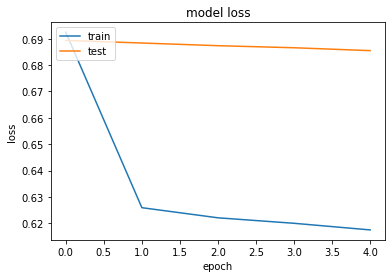

In [473]:
# plot loss and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [481]:
# Make prediction

user = 1
movies_not_watched = keras_ratings[keras_ratings['userId'] != user ]
movies_not_watched = movies_not_watched['movieId'].values
movies_not_watched = [[movie2movie_encoded.get(x)] for x in movies_not_watched]
user_encoder = user2user_encoded.get(user)
user_movie_array = np.hstack(([[user_encoder]] * len(movies_not_watched), movies_not_watched))
calculated_rating = model.predict(user_movie_array).flatten()
top_ratings_indices = calculated_rating.argsort()[-10:][::-1]
recommended_movie_ids = [movie_encoded2movie.get(movies_not_watched[x][0]) for x in top_ratings_indices]
recommended_movie_ids

[2858, 2858, 2858, 2858, 2858, 2858, 2858, 2858, 2858, 2858]

In [480]:
df[df["id"].isin(recommended_movie_ids)]

,genres,id,keywords,language,overview,popularity,countries,title,vote_average,vote_count,cast,crew
